In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Install necessary libraries
!pip install pandas numpy matplotlib seaborn wordcloud -q

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re

In [5]:
# Load the data from Google Drive (replace 'path_to_your_file' with the actual path to your Excel file in Google Drive)
file_path = '/content/drive/MyDrive/KLTN_2025/KLTN/data/data_news_final.xlsx'
data = pd.read_excel(file_path)

In [21]:
# View the total number of rows in the dataset
total_rows = len(data)
print(f"Total number of rows in the dataset: {total_rows}")

# View the first 6 rows of the dataset
print("First 6 rows of the dataset:")
display(data.head(6))

Total number of rows in the dataset: 12007
First 6 rows of the dataset:


,stt,title,link,published,source,content,summary,industry,sentiment,content_length
0,1,Nợ xấu ngân hàng trên 4%,https://vnexpress.net/ty-le-no-xau-noi-bang-cu...,"Tue, 20 May 2025 00:07:28 +0700",VnExpress-KinhDoanh,"Tính đến tháng 1/2025, tỷ lệ nợ xấu nội bảng t...","Đến tháng 1/2025, nợ xấu nội bảng toàn ngành n...",Finance,Negative,2781
1,2,Đồng minh loay hoay tìm cách đạt thỏa thuận th...,https://vnexpress.net/dong-minh-loay-hoay-tim-...,"Mon, 19 May 2025 17:00:02 +0700",VnExpress-KinhDoanh,Mỹ đạt thỏa thuận nhanh chóng với Trung ...,Mỹ đã đạt thỏa thuận nhanh với Anh và Trung Qu...,Other,Neutral,4746
2,3,Điểm kinh doanh vàng miếng tại TP HCM phải tre...,https://vnexpress.net/diem-kinh-doanh-vang-mie...,"Mon, 19 May 2025 16:43:46 +0700",VnExpress-KinhDoanh,Các điểm kinh doanh vàng miếng tại TP HCM phải...,NHNN yêu cầu các điểm kinh doanh vàng miếng tạ...,Finance,Neutral,2158
3,4,Chứng khoán lại mất mốc 1.300 điểm,https://vnexpress.net/chung-khoan-lai-mat-moc-...,"Mon, 19 May 2025 15:56:19 +0700",VnExpress-KinhDoanh,Áp lực chốt lời mạnh lên khiến VN-Index giảm p...,"VN-Index giảm phiên thứ hai liên tiếp, thủng m...",Finance,Negative,2991
4,5,"Đề xuất TP HCM, Hải Phòng, Đà Nẵng được tiếp t...",https://vnexpress.net/de-xuat-tp-hcm-hai-phong...,"Mon, 19 May 2025 13:42:13 +0700",VnExpress-KinhDoanh,"Hải Phòng, Đà Nẵng, Khánh Hòa, TP HCM và Cần T...","Chính phủ đề xuất Quốc hội cho phép Hải Phòng,...",Finance,Positive,3217
5,6,Hoạt động kinh tế của Trung Quốc chậm lại,https://vnexpress.net/hoat-dong-kinh-te-cua-tr...,"Mon, 19 May 2025 12:13:50 +0700",VnExpress-KinhDoanh,"Doanh số bán lẻ, sản lượng công nghiệp và ...","Doanh số bán lẻ, sản lượng công nghiệp và đầu ...",Finance,Negative,2847


1. Statistics of content column length (characters):
min         107.000000
max       31921.000000
mean       3782.972016
median     3392.000000
Name: content_length, dtype: float64



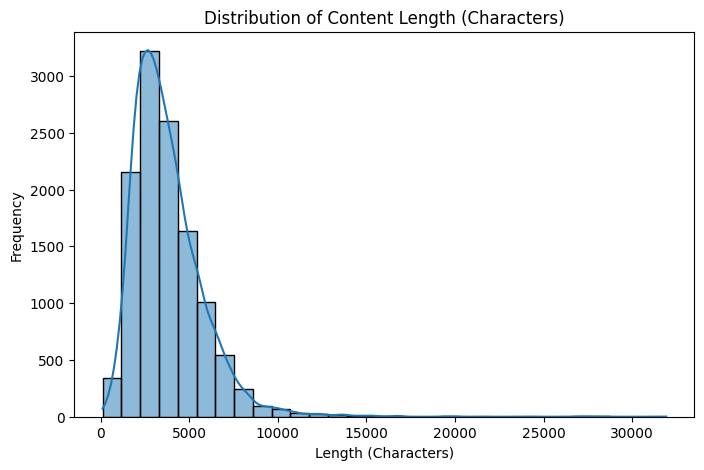

In [19]:
# 1. General statistics of the dataset - Content column length
data['content_length'] = data['content'].str.len()
stats = data['content_length'].agg(['min', 'max', 'mean', 'median'])
print("1. Statistics of content column length (characters):")
print(stats)
print()

# Visualize the distribution of content length with a histogram
plt.figure(figsize=(8, 5))
sns.histplot(data['content_length'], bins=30, kde=True)
plt.title('Distribution of Content Length (Characters)')
plt.xlabel('Length (Characters)')
plt.ylabel('Frequency')
plt.show()

1. Statistics of summary column length (characters):
min        98.000000
max       967.000000
mean      503.058133
median    492.000000
Name: summary_length, dtype: float64



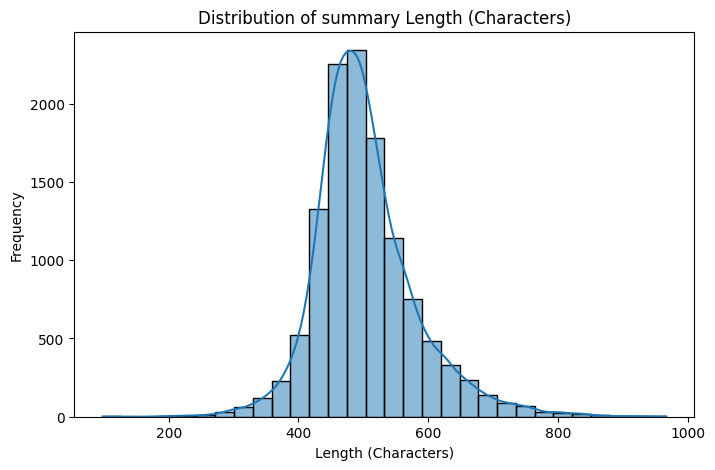

In [22]:
# General statistics of the dataset - summary column length
data['summary_length'] = data['summary'].str.len()
stats = data['summary_length'].agg(['min', 'max', 'mean', 'median'])
print("1. Statistics of summary column length (characters):")
print(stats)
print()

# Visualize the distribution of content length with a histogram
plt.figure(figsize=(8, 5))
sns.histplot(data['summary_length'], bins=30, kde=True)
plt.title('Distribution of summary Length (Characters)')
plt.xlabel('Length (Characters)')
plt.ylabel('Frequency')
plt.show()

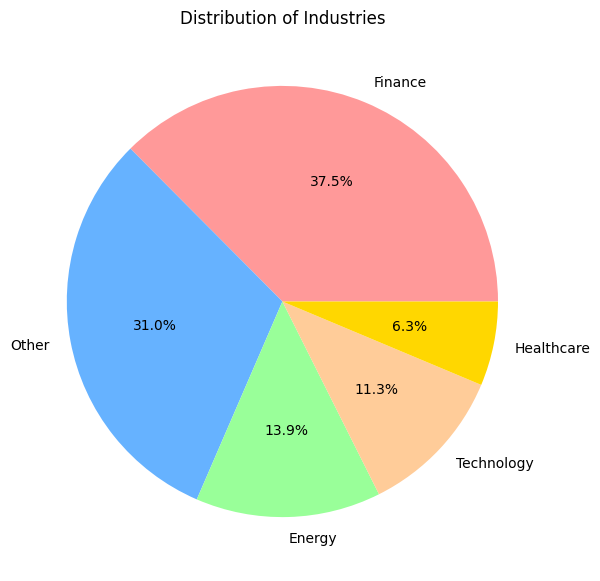

In [8]:
# 2. Industry label distribution
industry_counts = data['industry'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(industry_counts, labels=industry_counts.index, autopct='%1.1f%%', colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700'])
plt.title('Distribution of Industries')
plt.show()

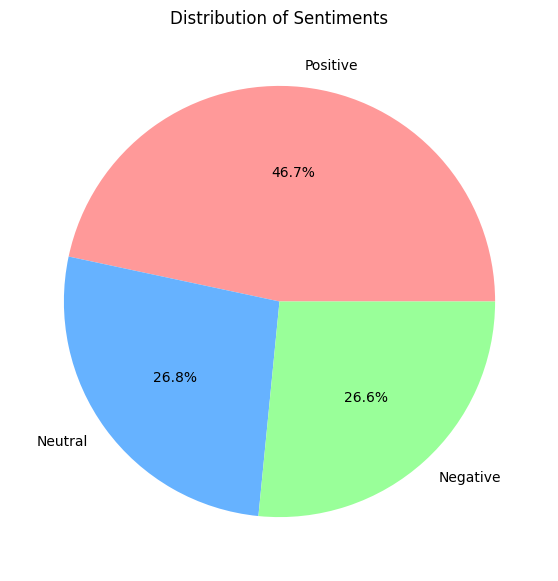

In [12]:
# 3. Sentiment label distribution
sentiment_counts = data['sentiment'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Distribution of Sentiments')
plt.show()


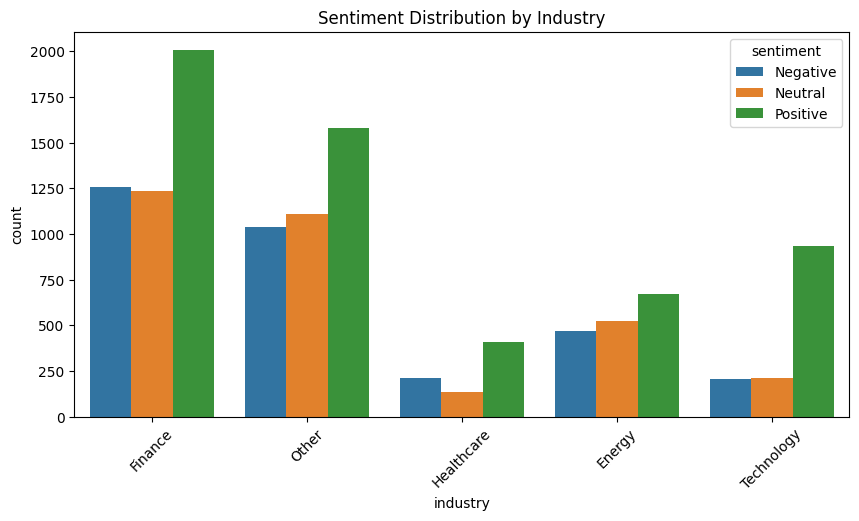

In [13]:

# Grouped bar chart for sentiment by industry
plt.figure(figsize=(10, 5))
sns.countplot(x='industry', hue='sentiment', data=data)
plt.title('Sentiment Distribution by Industry')
plt.xticks(rotation=45)
plt.show()

Top 10 Unigrams: [('và', 136846), ('các', 107639), ('trong', 93252), ('của', 93079), ('công', 84168), ('với', 83805), ('có', 76692), ('là', 67001), ('cho', 65736), ('đồng', 57747)]
Top 10 Bigrams: [('đầu tư', 31306), ('công ty', 27036), ('doanh nghiệp', 26469), ('thị trường', 25761), ('việt nam', 25003), ('tỷ đồng', 22558), ('phát triển', 19927), ('dự án', 19383), ('so với', 16608), ('có thể', 16431)]


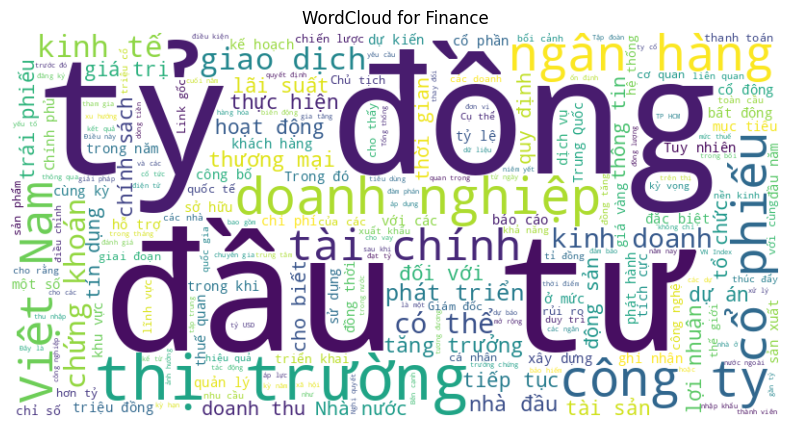

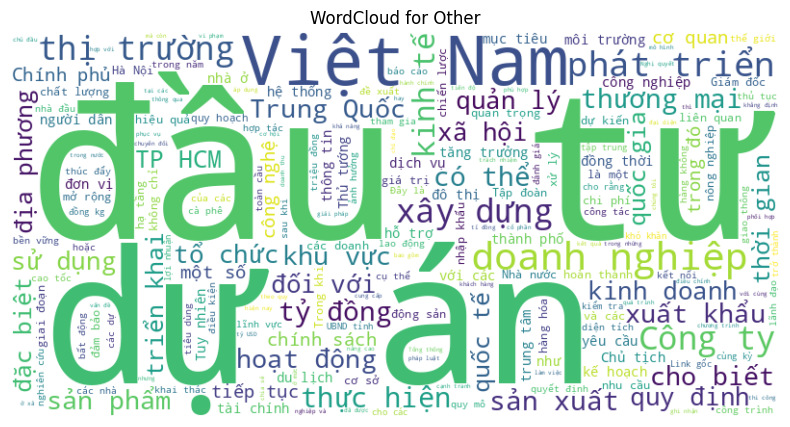

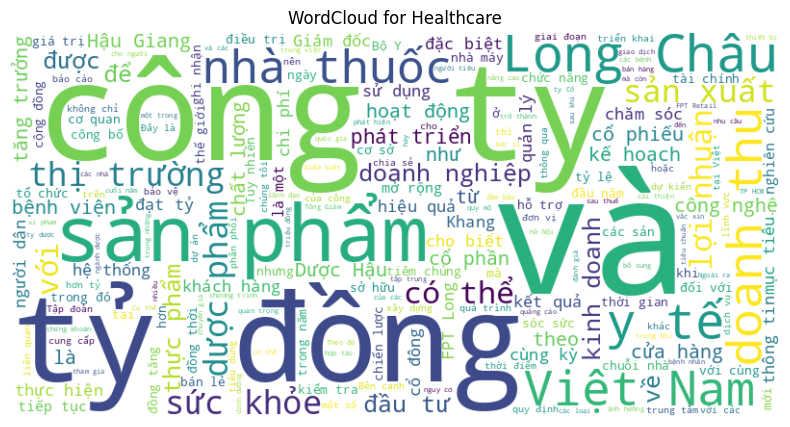

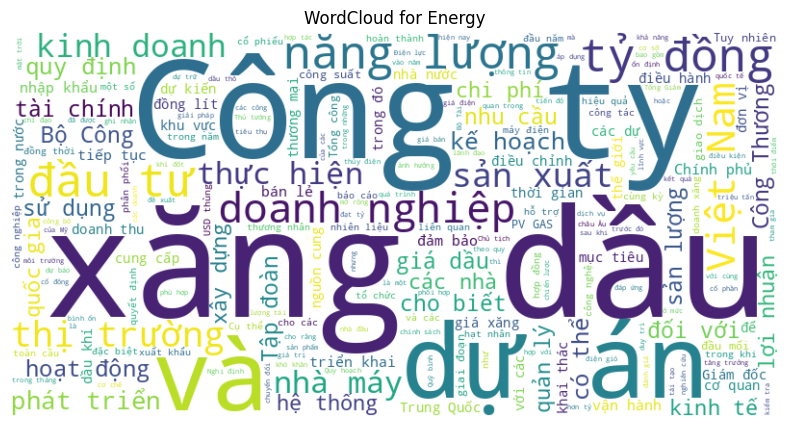

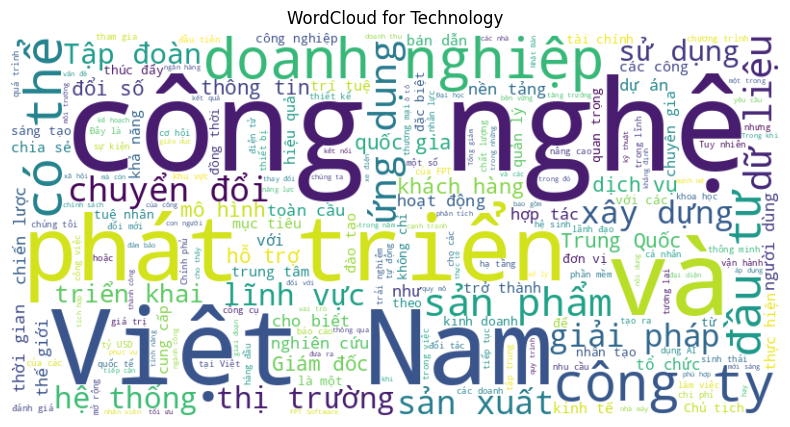

In [14]:
# 4. Keyword analysis
# Function to preprocess text
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', str(text).lower())
    return text

# Unigram and bigram extraction
def get_ngrams(text, n):
    words = preprocess_text(text).split()
    if n == 1:
        return words
    else:
        return [' '.join(words[i:i+n]) for i in range(len(words)-n+1)]

all_text = ' '.join(data['content'].dropna())
unigrams = get_ngrams(all_text, 1)
bigrams = get_ngrams(all_text, 2)
print("Top 10 Unigrams:", Counter(unigrams).most_common(10))
print("Top 10 Bigrams:", Counter(bigrams).most_common(10))

# WordCloud for each industry
for industry in data['industry'].unique():
    industry_text = ' '.join(data[data['industry'] == industry]['content'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(industry_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'WordCloud for {industry}')
    plt.axis('off')
    plt.show()


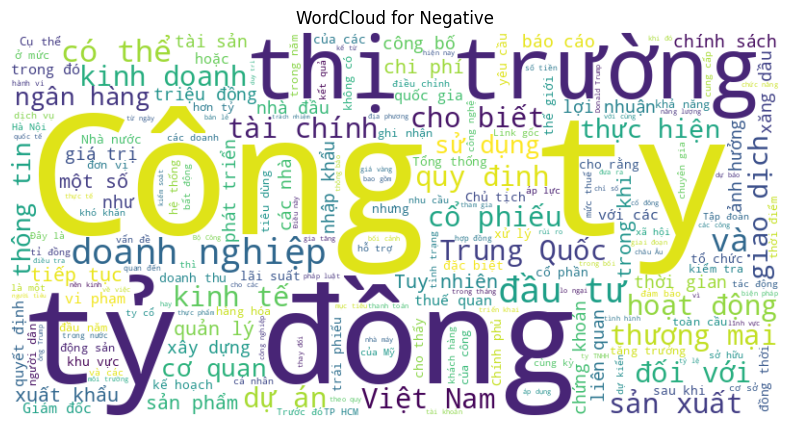

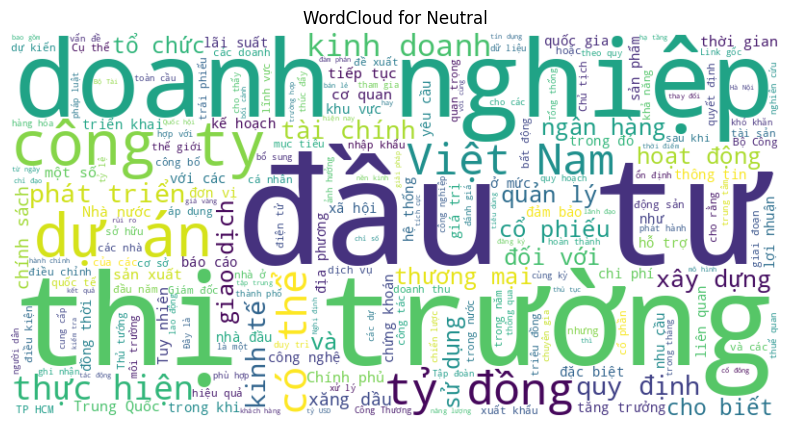

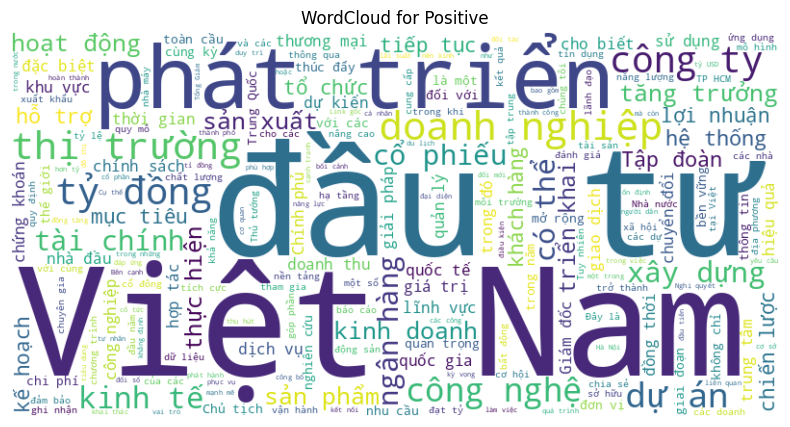

In [15]:
# WordCloud for each sentiment
for sentiment in data['sentiment'].unique():
    sentiment_text = ' '.join(data[data['sentiment'] == sentiment]['content'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentiment_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'WordCloud for {sentiment}')
    plt.axis('off')
    plt.show()


In [11]:
# 5. Sample examples
print("6. Sample examples representing each industry and sentiment:")
for industry in data['industry'].unique():
    for sentiment in data['sentiment'].unique():
        sample = data[(data['industry'] == industry) & (data['sentiment'] == sentiment)].sample(1)
        if not sample.empty:
            print(f"\nIndustry: {industry}, Sentiment: {sentiment}")
            print(f"Length: {sample['content_length'].iloc[0]} characters")
            print(f"Content: {sample['content'].iloc[0][:200]}...")  # Show first 200 chars
            print(f"Summary: {sample['summary'].iloc[0]}")

6. Sample examples representing each industry and sentiment:

Industry: Finance, Sentiment: Negative
Length: 6176 characters
Content: Tập đoànAPHchuẩn bị cho một năm hoạt động nhiều thách thức khi mảng BĐS khu công nghiệp và xuất khẩu sang Mỹ chịu ảnh hưởng từ việc chính quyền Tổng thống Donald Trump áp thuế đối ứng.Đoàn Chủ tịch AG...
Summary: Tại Đại hội cổ đông thường niên năm 2025 của Tập đoàn An Phát Holdings, ông Phạm Đỗ Huy Cường - Thành viên HĐQT, Tổng giám đốc cho biết năm 2025, Tập đoàn APH sẽ đối mặt với nhiều thách thức khi chính quyền Mỹ áp thuế đối ứng, ảnh hưởng đến mảng BĐS khu công nghiệp và xuất khẩu sang Mỹ. Tổng Giám đốc APH cũng cho biết doanh thu quý I/2025 dự kiến tăng 15%, lợi nhuận giảm 72%, và lỗ lưu kế được kỳ vọng khắc phục cuối năm 2025 hoặc đầu năm 2026. Đồng thời, Tập đoàn sẽ giảm tỷ lệ sở hữu mảng thương mại hạt nhựa từ quý II/2025.

Industry: Finance, Sentiment: Neutral
Length: 1831 characters
Content: Sáng 30.4, các ngân hàng đóng cửa trong kỳ nghỉ lễ 